# YOLOv5 Model Training Colab Tutorial
The goal of this notebook is to provide students with knowledge of the fundamentals of Google Colab and YOLOv5 training procedure. Colab provides a free environment that students will always have access to. It requires zero configuraion, free access to GPUs, and is easy to share. If you want to find more information about Colab, please visit https://colab.research.google.com/. For more information about yolov5, please visit https://github.com/ultralytics/yolov5. Enjoy model training!

**READ ME PLEASE**
1. Before you start training, open this notebook in Colab, enable GPUs on Colab (Runtime > Change runtime type > Hardware accelerator > GPU);
2. You may need to authorize Colab to mount your Google Drive. One of the problem to use Colab is its automatic disconnecting on a timeout, which may clear all the temp/cache. In this case, you could save the running resuls in your own drive to prevent data lose. Otherwise, you need to download the results manually;
3. You need to find you wandb API key since we use it to track the training process;
4. Please run the snippets **one by one**, and finish the sections with **TO DO**.

## **Preparation**

### **Check GPU Information**

In [1]:
!nvidia-smi

Tue Jul 26 21:28:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Dataset Download (TO DO)**

**TO DO:** Replace the following snippit with the Jupyter YOLOv5 PyTorch download code from roboflow

In [ ]:
# The download code should look like:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="api_key")
# project = rf.workspace("ai-cmp").project("project_name")
# dataset = project.version(1).download("yolov5")

### **Wandb Install (TO DO)**

In [4]:
# install wandb
! pip install wandb -qqq

     |████████████████████████████████| 1.8 MB 7.0 MB/s 
     |████████████████████████████████| 181 kB 62.4 MB/s 
     |████████████████████████████████| 153 kB 61.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


**TO DO:** Enter your wandb api key

In [ ]:
wandb_key = 'wandb_key'

In [ ]:
# import wandb and log in your account
import wandb
wandb.login(key=wandb_key)

### **YOLOv5 Install**

In [5]:
# Change the working directory to "/content", the default working path for Colab
import os
os.chdir('/content')

In [6]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-324-g0b5ac22 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/78.2 GB disk)


### **Path Setting**

In [7]:
# Get path to yolov5
yolo_loc = os.getcwd()
print(os.getcwd())

/content/yolov5


**TO DO:** check the *Files* button on the left of the UI, copy the path of your dataset to the following data_loc variable

In [8]:
data_loc = '/content/your-dataset-name'

In [11]:
import shutil

# Copy the dataset to yolo folder
dataset_name = data_loc[8:]
try:
    shutil.copytree(data_loc, yolo_loc + dataset_name)
except:
    pass

## **Model Training**


### **Start Training**

**TO DO:** Set the batch size, epochs, weights

In [ ]:
DIM = 416
BATCH = 8
EPOCHS = 100
MODEL = 'yolov5s6'

In [ ]:
!python train.py --img {DIM} --batch {BATCH} --epochs {EPOCHS} --data {data_loc}/data.yaml --weights {MODEL}.pt --cache

### **Result Saving (TO DO)**
You could also manually download all the result files. Below we provide codes to save the results to your google drive.

**TO DO:** Run the following snippet first. If you get a path error, find the correct output path to the results (you could find this information in the log of train.py (above). It should look like 'run/train/exp{1,2,3}'

In [ ]:
output_train_dir = 'runs/train/exp'
!ls {output_train_dir}

confusion_matrix.png				   R_curve.png
events.out.tfevents.1655922792.10dfab3a5b71.441.0  results.csv
F1_curve.png					   results.png
hyp.yaml					   train_batch0.jpg
labels_correlogram.jpg				   train_batch1.jpg
labels.jpg					   train_batch2.jpg
opt.yaml					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   weights


**TO DO:** The following code will help you to create a new folder named "AI Camp" in your google drive and store all the results there. You could modify save_path var to change the saving location.

In [ ]:
save_path = '/content/drive/MyDrive/AI Camp'

In [ ]:
try:
    shutil.copytree(output_train_dir, save_path + '/train')
except:
    pass

'/content/drive/MyDrive/AI Camp/train'

## **Visulization**
The following snippets only visulize part of the results. You could find your model and results at yolov5/runs/train/exp or your wandb account.

### **Class Distribution**

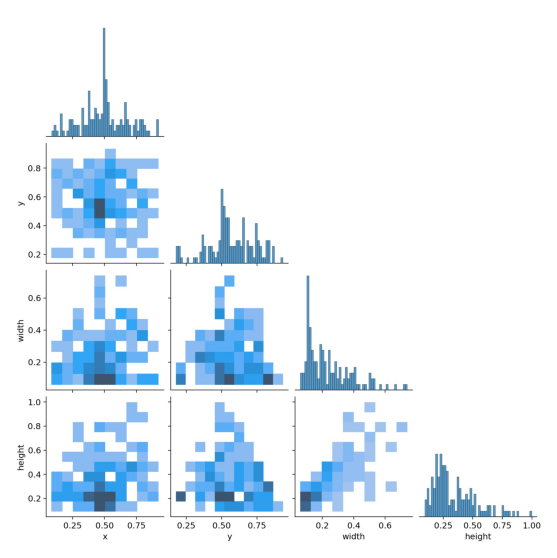

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(plt.imread(f'{output_train_dir}/labels_correlogram.jpg'));

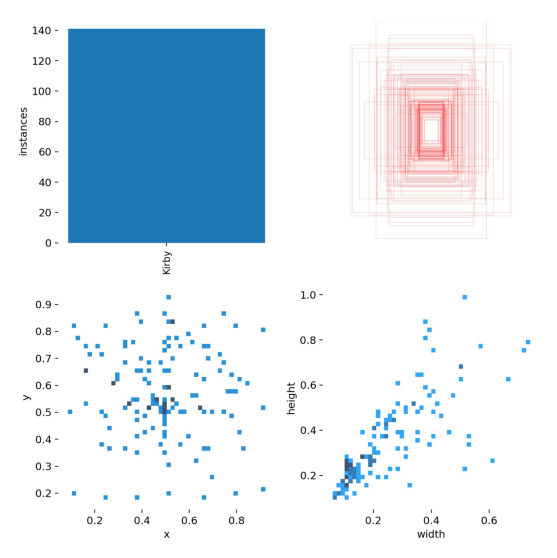

In [ ]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(plt.imread(f'{output_train_dir}/labels.jpg'));

### **Batch Visulization**

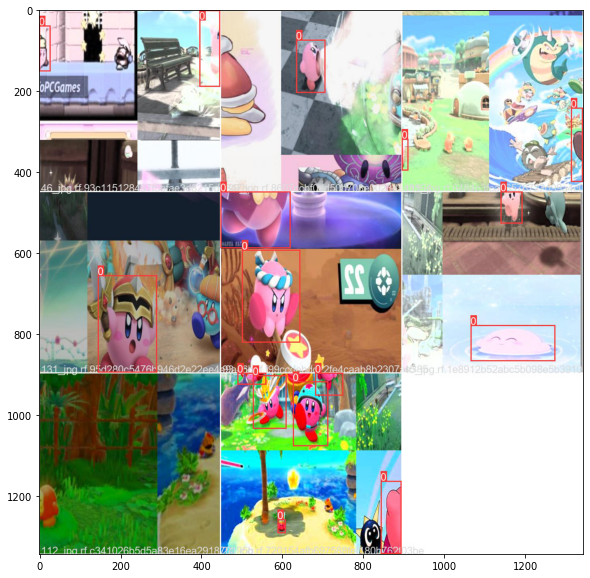

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(plt.imread(f'{output_train_dir}/train_batch0.jpg'))

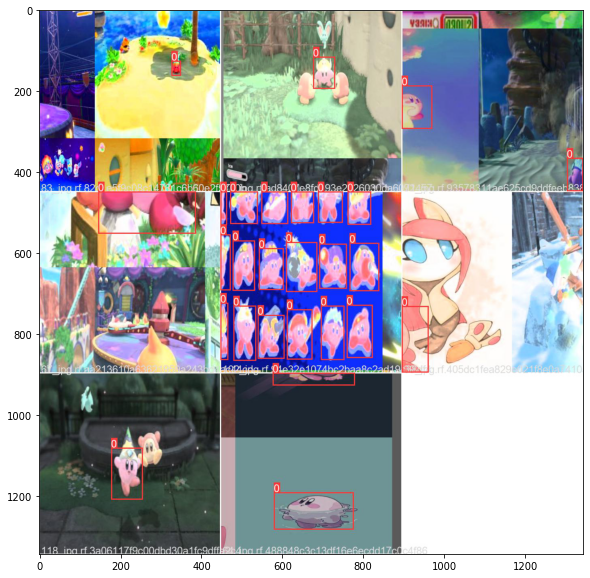

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(plt.imread(f'{output_train_dir}/train_batch1.jpg'))

### **Ground True vs Predicted**

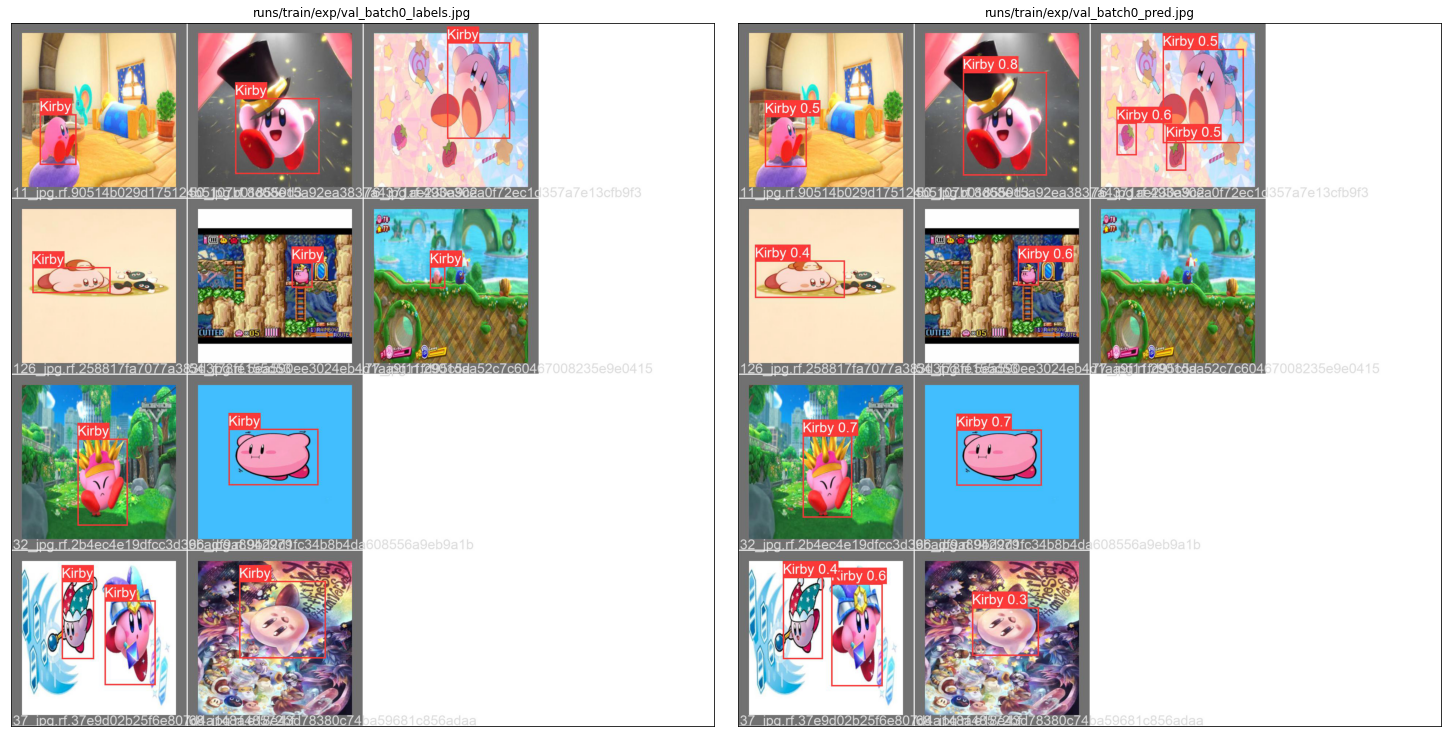

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,20), constrained_layout = True)
ax[0].imshow(plt.imread(f'{output_train_dir}/val_batch0_labels.jpg'))
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title(f'{output_train_dir}/val_batch0_labels.jpg', fontsize = 12)

ax[1].imshow(plt.imread(f'{output_train_dir}/val_batch0_pred.jpg'))
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title(f'{output_train_dir}/val_batch0_pred.jpg', fontsize = 12)
plt.show()

### **Score vs Epoch**

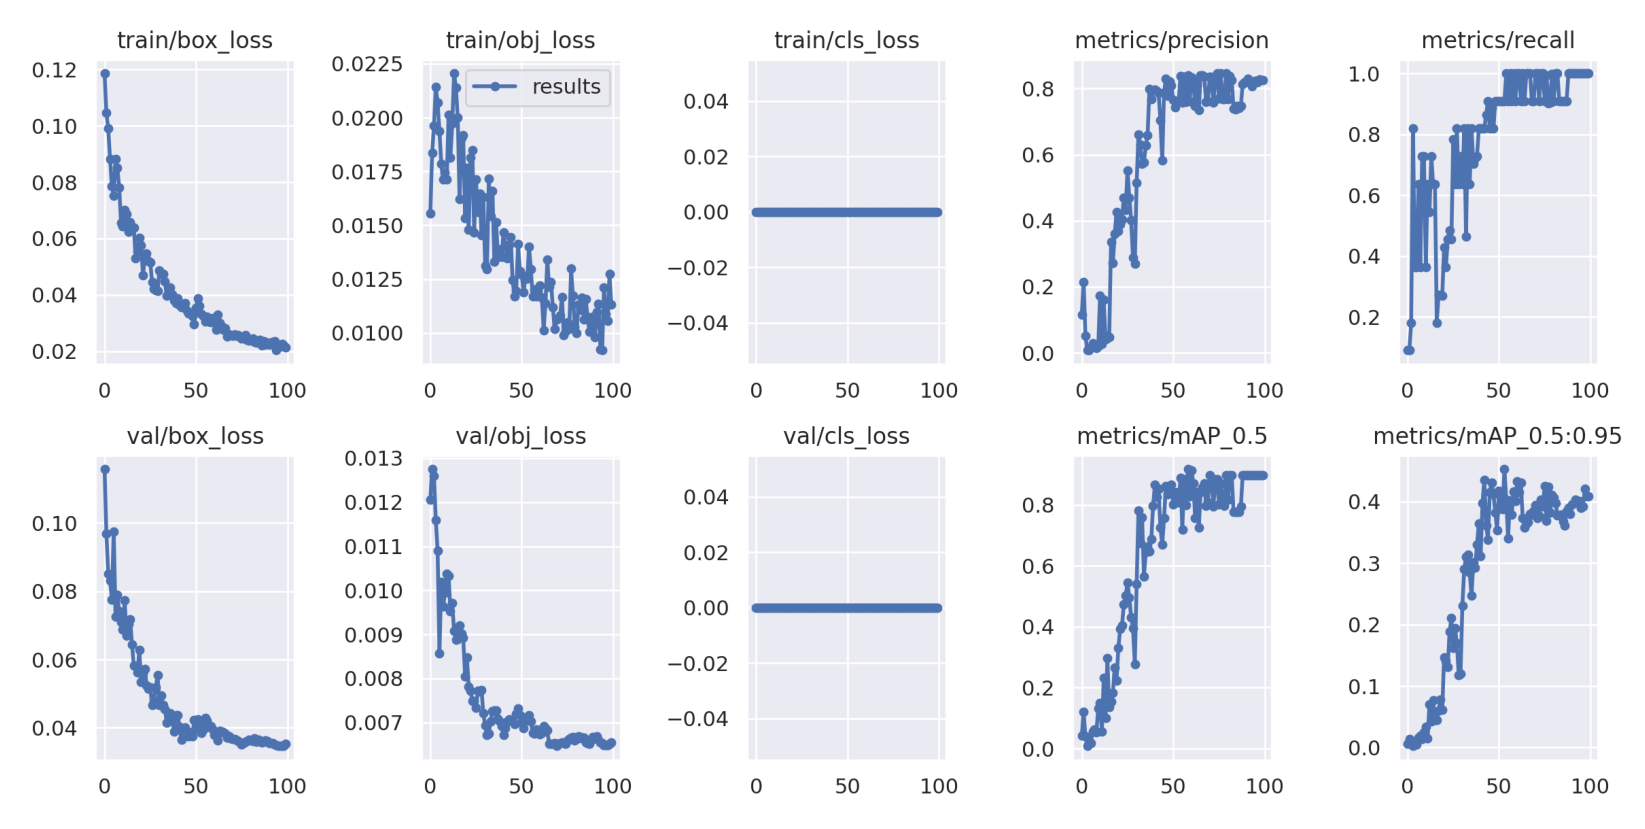

In [ ]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread(f'{output_train_dir}/results.png'));

### **Confusion Matrix**

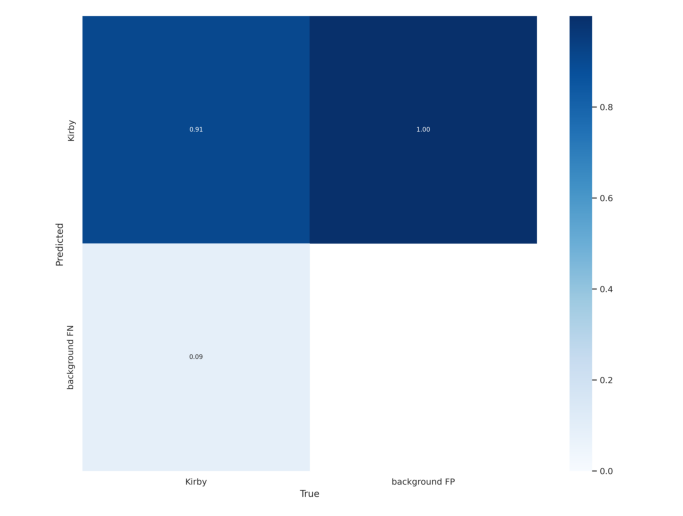

In [ ]:
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(plt.imread(f'{output_train_dir}/confusion_matrix.png'))

### **Metrics**

Metric: F1


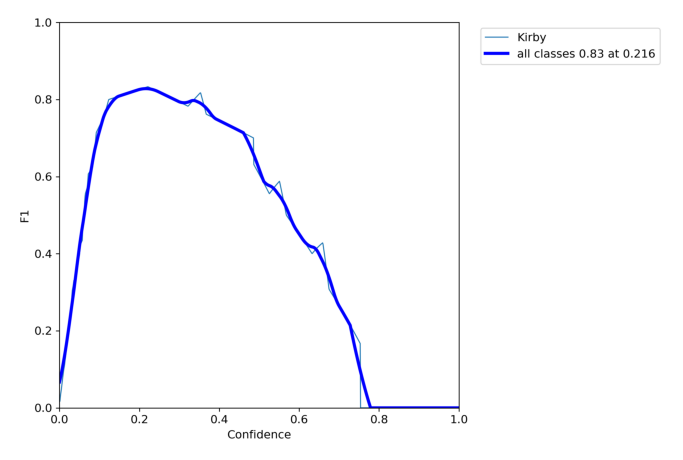

Metric: PR


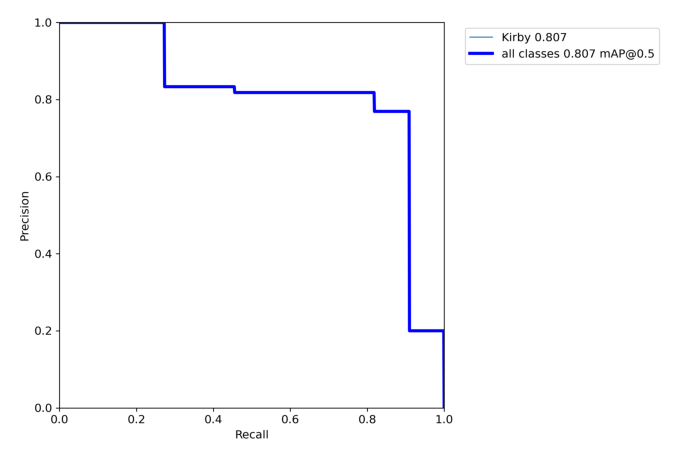

Metric: P


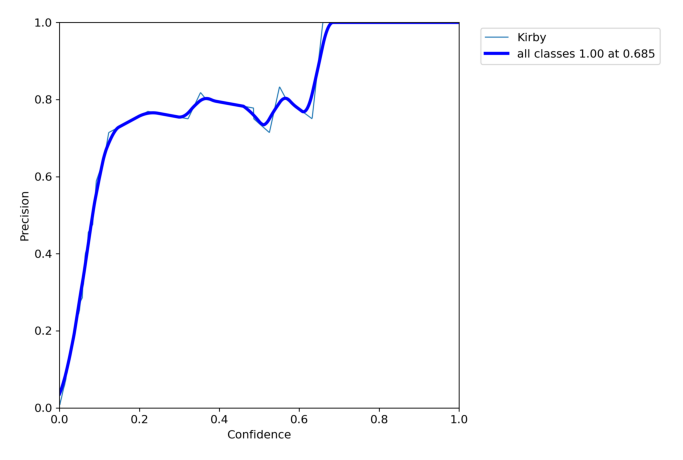

Metric: R


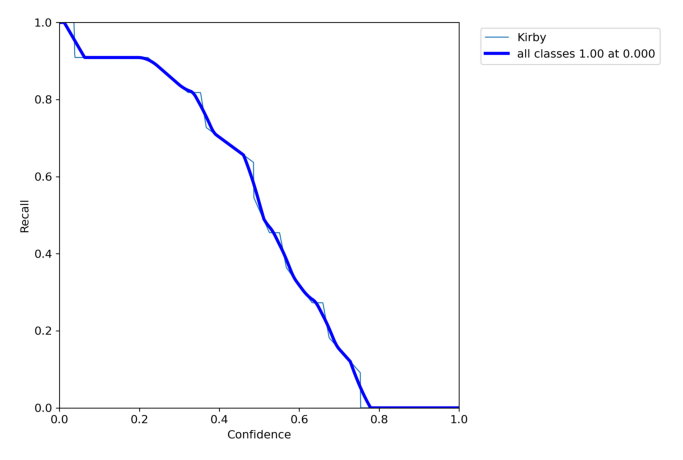

In [ ]:
for metric in ['F1', 'PR', 'P', 'R']:
    print(f'Metric: {metric}')
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(plt.imread(f'{output_train_dir}/{metric}_curve.png'));
    plt.show()

## **Acknowledgement**
Congratulations! You successfully trained the yolov5 model for your web-product.

Thanks for joining AI Camp and using this tutorial. If you have any question or suggestion regarding this tutorial, please feel free to reach out to your instructor or the author (Jinxuan Tang, Lead DSI Summer 2022, erisedtang@gmail.com).